In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
# https://www.videezy.com/free-video/pedestrian  --> more videos
VIDEO = "../video/pedestrian.mp4"

In [16]:
#out = cv2.VideoWriter('output.avi', -1, 20.0, (300,600))
out = cv2.VideoWriter('output.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (300,600))


In [17]:
def video_play(VIDEO, h):
    cap = cv2.VideoCapture(VIDEO)
    print('Image size: {} x {}'.format(cap.get(3), cap.get(4)))
    
    count = 1
    while(cap.isOpened()):
        ret, frame = cap.read()
        cv2.imshow('frmae', frame)
        imout = cv2.warpPerspective(frame, h, (300, 600))
        out.write(imout)
        
        # save the frame when press s
        if cv2.waitKey(33) == ord('s'):
            print('save the frmae')
            cv2.imwrite('frame_{}.jpg'.format(count), frame)
        
        # quick the video when press q
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        count += 1
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [18]:
video_play(VIDEO, h)

Image size: 1280.0 x 720.0


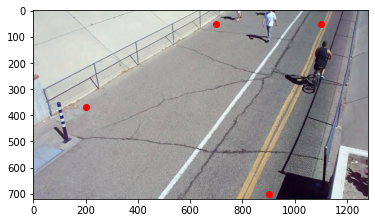

In [10]:
im = plt.imread('frame_153.jpg')
implot = plt.imshow(im)

# put a red dot 
# src
plt.scatter([200], [370], c='r')
plt.scatter([900], [700], c='r')
plt.scatter([700], [50], c='r')
plt.scatter([1100], [50], c='r')
plt.show()

In [19]:
# src
pts_src = np.float32([[200, 370],[900,700],[1100,50],[700,50]])

# dst 
pts_dst = np.float32([[0,600],[300,600],[300,0],[0,0]])

# compute homography
h, status = cv2.findHomography(pts_src, pts_dst)
imout = cv2.warpPerspective(im, h, (300, 600))

plt.imshow(imout)